# 0. At this point you should have:

1. performed CCS construction using __PacBio Unanimity program__ (https://github.com/PacificBiosciences/unanimity)
2. filtered quality of the obtained reads using bamtools as follows:


```bash
$ bamtools filter -tag "np:>10" -in yourfile.ccs.bam | bamtools filter -tag "rq>0.999" | bamtools convert -format fastq -out yourfile.fastq
```

Now, __yourfile.fastq__ can be used as input to the Library instance. In other words, in this example, __yourfile.fastq__ here is __../data/quality_filtered/reads.filtered.fastq__

***

In [41]:
from pacbio_parser import *
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Specify parameters:
    - path to data, 
    - start pattern of our target sequence,
    - barcode pattern
    - original sequence being mutated

In [2]:
file_path = '../data/quality_filtered/reads.filtered.fastq'
start_pattern = 'ATGAGCA'
barcode_pattern = r'GGAACA(.){20}'
ref_seq = 'ATGAGCAAGGGCGAGGAGCTGTTCACCGGGATCGTGCCCGTCCTGATTGAGCTGGACGGCGACGTACACGGCCACAAGTTCAGCGTGCGCGGCGAGGGCGAGGGCGATGCCGACTACGGCAAGCTGGAGATCAAGTTCATCTGCACCACCGGCAAGCTGCCCGTGCCCTGGCCCACCCTCGTGACCACCCTGTCGTACGGCATTTTGTGCTTCGCGCGCTACCCCGAACACATGAAGATGAACGACTTCTTCAAGTCCGCCATGCCCGAAGGCTACATCCAGGAGCGCACCATCTTCTTCCAGGACGACGGCAAGTACAAGACCCGTGGGGAGGTGAAGTTCGAGGGCGACACACTGGTGAACCGCATCGAGCTGAAGGGCATGGACTTCAAGGAGGACGGCAACATCCTGGGGCACAAGCTGGAGTACAACTTTAACAGCCACAACGTCTATATCATGCCAGACAAGGCTAATAACGGCCTGAAGGTGAACTTCAAGATCCGCCACAACATCGAGGGCGGCGGGGTGCAGCTCGCCGACCACTACCAGACGAACGTTCCCTTGGGCGACGGCCCCGTGCTGATCCCCATCAACCACTACCTGAGCTGTCAGACAGCCATCAGCAAAGACCGTAACGAGACTCGCGATCACATGGTCTTTCTGGAGTTCTTTAGTGCCTGTGGGCATACTCACGGCATGGACGAGCTGTACAAGTGATGATGAGCGGCGCCTA'

# 2. Import reads from a fastq file

In [3]:
library = Library(file_path)

This library size is 209441 consensus reads


# 3. Find sequence start

#### 3.1. Find the target sequence start in all the reads of our library and crop everything up until the start

In [4]:
library.trim_start(start_pattern)

#### 3.2. Clean all the empty reads

In [5]:
library.clean_library()

Before cleaning we had 209441 reads.
Now we have 199954 reads left.


# 4. Find barcode pattern

#### 4.1. Behind the scene steps:
    - Find where the barcode is,
    - Trim it together with the specified bits of the sequence, 
    - Store it in a separate feature of the read (read.bc) together with its quality (read.bc_quality)

In [6]:
library.get_bc_and_trim(barcode_pattern, indentation=6, bc_length=20)

#### 4.2. Clean all the empty reads

In [7]:
library.clean_library()

Before cleaning we had 199954 reads.
Now we have 192532 reads left.


# 5. Visualize

Text(0.5,1,'Read length distribution')

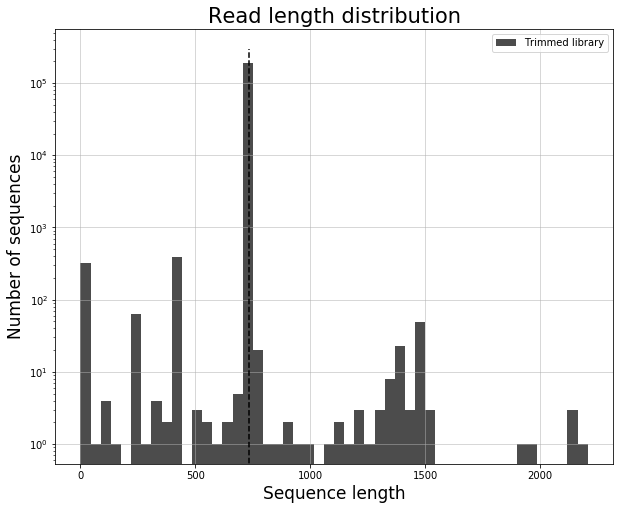

In [8]:
log=True

plt.figure(figsize=[10,8])
plt.hist([sq.length for sq in library.sequences],bins=50,log=log,color='k',alpha=0.7,label='Trimmed library')
plt.grid(lw=0.5)
plt.plot([733,733],[0,300000],'--k')
plt.legend()
plt.xlabel('Sequence length',fontsize=17)
plt.ylabel('Number of sequences',fontsize=17)
plt.title('Read length distribution', fontsize=21)

# 6. Filter library based on read length

#### After all the trimming, our target product length (selected) should be 733:

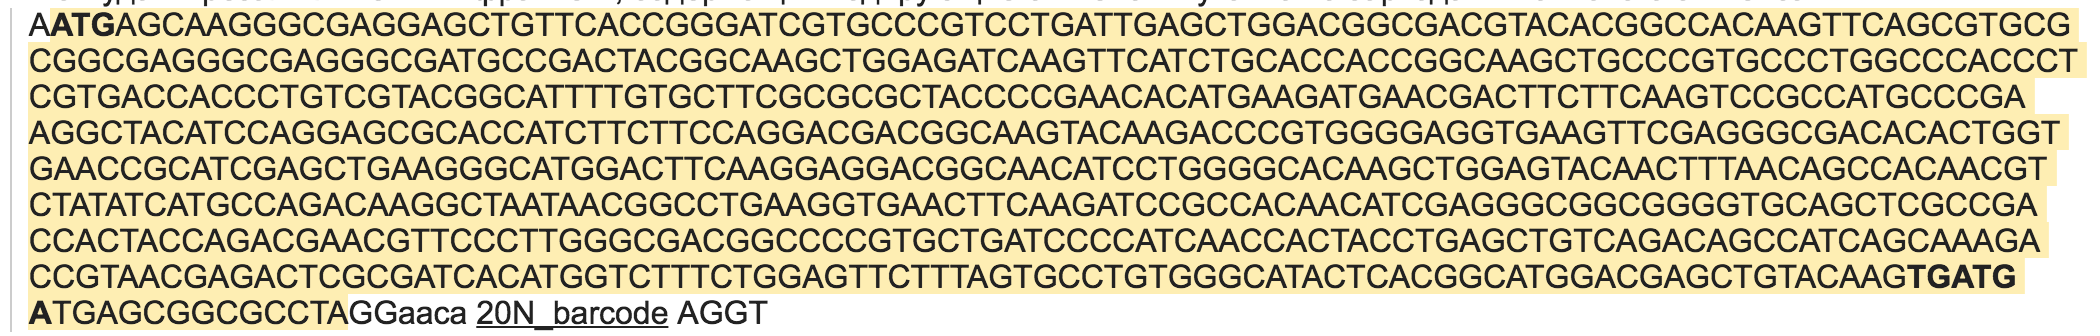

In [9]:
library.filter_by_length(length=733)

Before filtering we had 192532 reads.
Now we have 141728 reads left.


# 7. Describe mutations

#### 7.1. Convert sequences to lists of mutations

In [10]:
library.extract_mutations(ref_seq)

#### 7.2. Plot distributions

Text(0.5,1,'Number of mutations per read in the library')

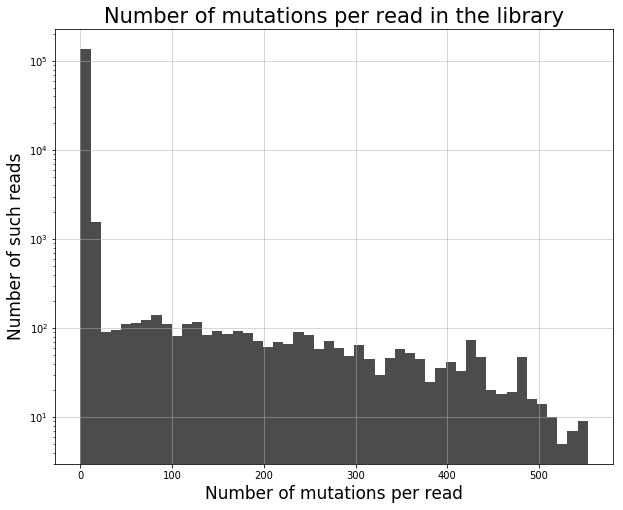

In [12]:
plt.figure(figsize=[10,8])
plt.hist([sq.n_mutations for sq in library.sequences],bins=50,log=log,color='k',alpha=0.7)
plt.grid(lw=0.5)
plt.xlabel('Number of mutations per read',fontsize=17)
plt.ylabel('Number of such reads',fontsize=17)
plt.title('Number of mutations per read in the library', fontsize=21)

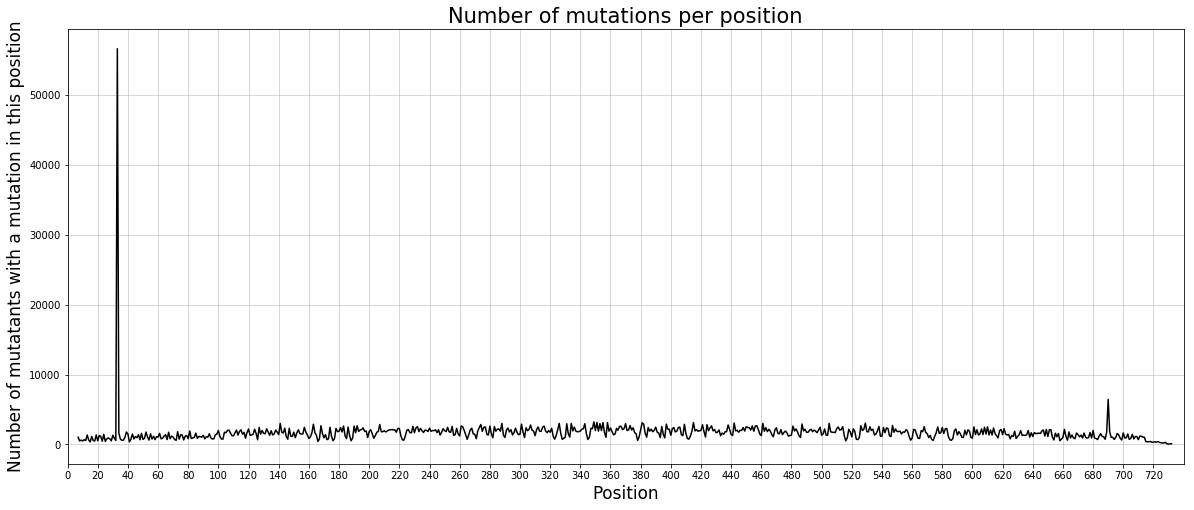

In [21]:
pos = collections.Counter(flatten([sq.mutations_pos for sq in library.sequences]))

plt.figure(figsize=[20,8])
plt.xticks([x for x in range(0,740,20)])
plt.xlim(0,740)
plt.grid(lw=0.5)
plt.plot(pos.keys(),pos.values(),'k-')
plt.xlabel('Position',fontsize=17)
plt.ylabel('Number of mutatants with a mutation in this position',fontsize=17)
plt.title('Number of mutations per position', fontsize=21);

#### 7.3. Take a look at the sequencing quality of mutations

Here is the quality scale (ascending left to right):

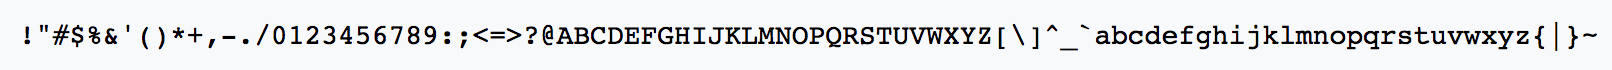

In [31]:
for sq in library.sequences:
    if len(sq.mutations) > 550:
        print sq.name, sq.mutations_quality, '\n'

@m54067_180413_223706/15401227/ccs ['~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', 'r', '9', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~',

#### 7.4. Check mutation frequencies

In [34]:
muts = collections.Counter(flatten([sq.mutations for sq in library.sequences]))

Text(0.5,1,'Sunstitution coverage')

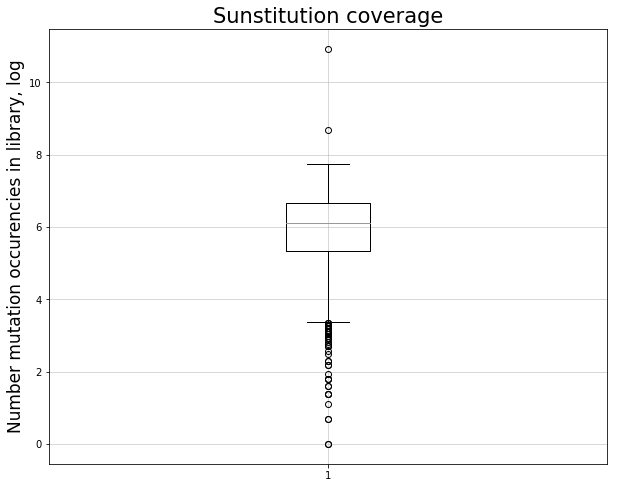

In [51]:
plt.figure(figsize=[10,8])
plt.boxplot([np.log(x) for x in muts.values()])
plt.grid(lw=0.5)
plt.ylabel('Number mutation occurencies in library, log',fontsize=17)
plt.title('Sunstitution coverage', fontsize=21)

#### 7.5. Check substitution type stats

In [29]:
collections.Counter(flatten([sq.mutation_type for sq in library.sequences]))

Counter({'AC': 85137,
         'AG': 151512,
         'AT': 114374,
         'CA': 119199,
         'CG': 73695,
         'CT': 103848,
         'GA': 117508,
         'GC': 72732,
         'GT': 142504,
         'TA': 87623,
         'TC': 119076,
         'TG': 44596})